## International Alcohol Consumption

One thing that at least a lot of countries share is their predilection for alcohol. Thanks to Guilherme Samora for data, questions, and inspiration (https://github.com/guipsamora).

Data can be accessed here: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv.

### Loading and preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
alc = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv")

In [3]:
#Columns we're dealing with
alc.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [4]:
#Number of countries in the dataset
alc.shape[0]

193

In [5]:
#Continents in the dataset
alc['continent'].unique()

array(['AS', 'EU', 'AF', nan, 'SA', 'OC'], dtype=object)

You'll notice that Antarctica is missing (predictable, although I do wonder how much they drink over there), but North America is too. We'll manually change Canada and the USA to the continent of NA.

In [6]:
usIndex = alc[alc['country'] == 'USA']
canadaIndex = alc[alc['country'] == 'Canada']

In [7]:
alc.iloc[usIndex.index, alc.columns.get_loc('continent')] = 'NA'
alc.iloc[canadaIndex.index, alc.columns.get_loc('continent')] = 'NA'

### Which countries and continents drink the most beer?

In [8]:
alc.sort_values('beer_servings', ascending=False)[['country', 'beer_servings']].head(10)

,country,beer_servings
117,Namibia,376
45,Czech Republic,361
62,Gabon,347
65,Germany,346
98,Lithuania,343
135,Poland,343
188,Venezuela,333
81,Ireland,313
129,Palau,306
140,Romania,297


Namibia. Who knew.

In [9]:
alc.groupby('continent').agg({'beer_servings': np.mean}).sort_values('beer_servings', ascending=False)

,beer_servings
continent,
NA,244.500000
EU,193.777778
SA,175.083333
OC,89.687500
AF,61.471698
AS,37.045455


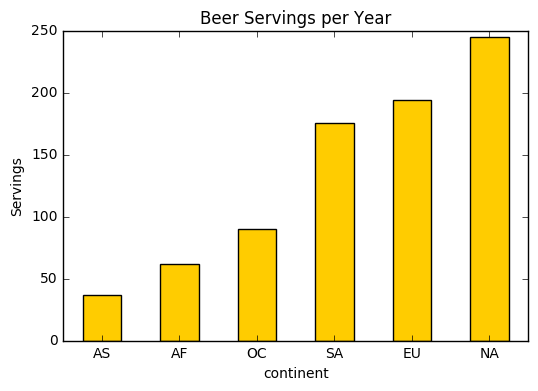

In [10]:
beer = alc.groupby('continent').agg({'beer_servings': np.mean}).sort_values('beer_servings')
beer.plot(kind='bar', legend='', color='#ffcc00')
plt.xticks(rotation=0)
plt.title('Beer Servings per Year')
plt.ylabel('Servings')

Despite the fact that Namibia is the top beer consumer as a country, the top continent is North America ('MURICA). In fact, Africa as a continent is second to last overall.

### Which countries and continents drink the most wine?

In [11]:
alc.sort_values('wine_servings', ascending=False)[['country', 'wine_servings']].head(10)

,country,wine_servings
61,France,370
136,Portugal,339
3,Andorra,312
166,Switzerland,280
48,Denmark,278
156,Slovenia,276
99,Luxembourg,271
42,Croatia,254
83,Italy,237
55,Equatorial Guinea,233


Unlike Namibia, I think France was pretty predictable here. And Europe seems to dominate here, as far as continents go.

In [12]:
alc.groupby('continent').agg({'wine_servings': np.mean}).sort_values('wine_servings', ascending=False)

,wine_servings
continent,
EU,142.222222
NA,92.000000
SA,62.416667
OC,35.625000
AF,16.264151
AS,9.068182


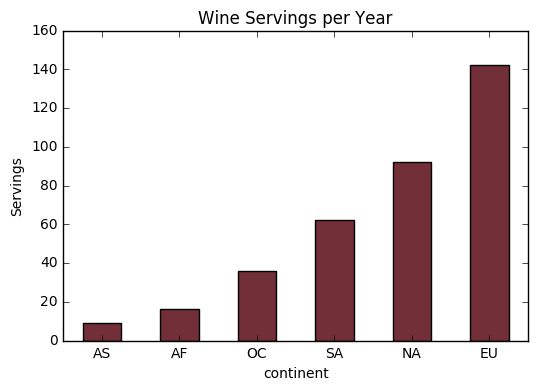

In [13]:
wine = alc.groupby('continent').agg({'wine_servings': np.mean}).sort_values('wine_servings')
wine.plot(kind='bar', legend='', color='#722f37')
plt.xticks(rotation=0)
plt.title('Wine Servings per Year')
plt.ylabel('Servings')

Now this is where it gets interesting: on a continent basis, each landmass consumes far less wine than it does beer – which makes sense, since wine can have 3x the alcohol content. *But* the top consumers of wine – France and Portugal specifically – consumer almost as many servings of wine per year as the top beer consuming countries drink beer.

To put this in perspective, France drinks:

* 2.6 times as much as the European average
* 4 times as much as the North American average
* 23 times as much as the African average
* 41 times as much as the Asian average

That's a lot of wine.

### Which countries and continents drink the most liquor?

In [14]:
alc.sort_values('spirit_servings', ascending=False)[['country', 'spirit_servings']].head(10)

,country,spirit_servings
68,Grenada,438
15,Belarus,373
73,Haiti,326
141,Russian Federation,326
144,St. Lucia,315
72,Guyana,302
155,Slovakia,293
50,Dominica,286
169,Thailand,258
40,Cook Islands,254


Amazingly, Grenada actually consumes more spirits per year than France does wine. We'll return to this below. As far as continents:

In [15]:
alc.groupby('continent').agg({'spirit_servings': np.mean}).sort_values('spirit_servings', ascending=False)

,spirit_servings
continent,
NA,140.000000
EU,132.555556
SA,114.750000
AS,60.840909
OC,58.437500
AF,16.339623


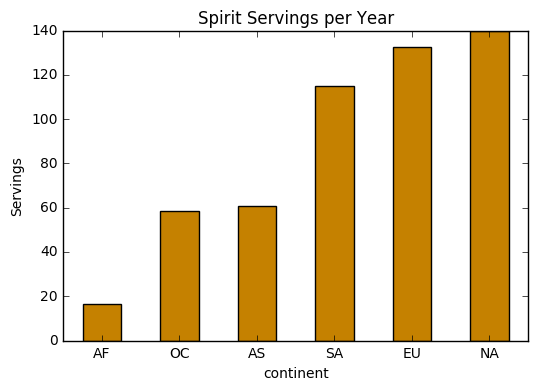

In [16]:
spirits = alc.groupby('continent').agg({'spirit_servings': np.mean}).sort_values('spirit_servings')
spirits.plot(kind='bar', legend='', color='#c58100')
plt.xticks(rotation=0)
plt.title('Spirit Servings per Year')
plt.ylabel('Servings')

As with beer, North America takes the cake with average spirit consumption, albeit with only a slight 7.5 serving margin over Europe.

Grenada seems to surpass even France in its dominance over other countries. To put *this* in perspective, Grenada consumes:

* 3.1 times as much as the North American average
* 7.3 times as much as the Asian average
* 27.3 times as much as the African average

Servings of spirits are smaller, so that might explain part of it.

### Which countries and continents drink the most alcohol overall?

We can get a sense for overall consumption normalizing each column and then adding them together for an alcohol score.

In [17]:
#Perform min / max scaling on our columns
for column in ['beer_servings', 'wine_servings', 'spirit_servings']:
    alc[column] = (alc[column] - alc[column].mean()) / (alc[column].max() - alc[column].min())

In [18]:
alc['alc_score'] = alc['beer_servings'] + alc['wine_servings'] + alc['spirit_servings']
alc.sort_values('alc_score', ascending=False)[['country', 'alc_score']].head(10)

,country,alc_score
3,Andorra,1.208995
45,Czech Republic,1.109484
61,France,1.081602
99,Luxembourg,1.062832
65,Germany,1.059397
98,Lithuania,1.019751
75,Hungary,1.012295
68,Grenada,1.004018
141,Russian Federation,0.997592
136,Portugal,0.984229


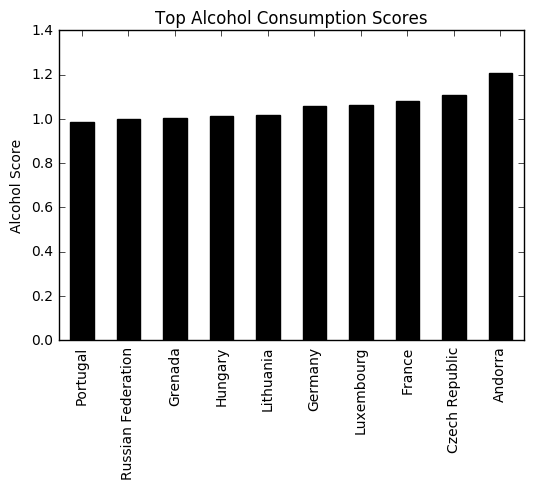

In [19]:
alc_score = alc.sort_values('alc_score')[['country', 'alc_score']].tail(10)
alc_score.plot(x=alc_score['country'], kind='bar', legend='', color='black')
plt.title('Top Alcohol Consumption Scores')
plt.xlabel('')
plt.ylabel('Alcohol Score')

And Andorra takes the cake! This is cool, because it didn't take the top spot in any of the individual competitions, and only made the top 10 for wine consumption (#3). Consistency is king, I guess. As for continents:

In [20]:
alc.groupby('continent').agg({'alc_score': np.mean}).sort_values('alc_score', ascending=False)

,alc_score
continent,
NA,0.617637
EU,0.601477
SA,0.295415
OC,-0.132679
AS,-0.338973
AF,-0.356162


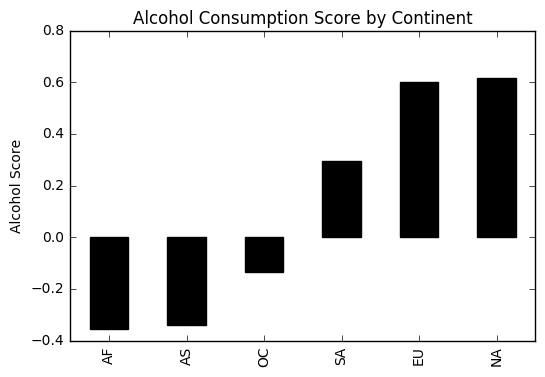

In [21]:
alc_score = alc.groupby('continent').agg({'alc_score': np.mean}).sort_values('alc_score')
alc_score.plot(kind='bar', legend='', color='black')
plt.title('Alcohol Consumption Score by Continent')
plt.xlabel('')
plt.ylabel('Alcohol Score')

Looks like Andorra was not representative – North America takes the cake with an alcohol score of .61! Europe was a close second with .6, which is double the nearest competitor, South America (.29). Do not confuse these numbers with blood alcohol levels.

### Are different types of alcohol consumption correlated with each other?

We can use the .corr function to compute correlations between series.

In [22]:
alc['beer_servings'].corr(alc['wine_servings'])

0.52717169350652104

In [23]:
alc['beer_servings'].corr(alc['spirit_servings'])

0.45881887413938216

In [24]:
alc['wine_servings'].corr(alc['spirit_servings'])

0.19479704700984549

Beer and wine, and beer and spirits, seem to have at least some degree of correlation. Wine and spirits have a much lower degree.